# Spaceship Titanic Competition

### Goals: data analysis and visualization, figure out relevant columns, split cabin column

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

final_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

### Splitting cabin into three columns

Links: https://www.geeksforgeeks.org/split-a-text-column-into-two-columns-in-pandas-dataframe/, https://stackoverflow.com/questions/34304899/how-to-split-a-single-column-into-three-columns-in-pandas-python

In [3]:
train_data.Cabin

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/

(note - only did this to my train data, so I will have to do it do my final data, if relevant)

In [4]:
cabin = train_data['Cabin'].str.split('/', 3, expand=True)
cabin.columns = ['Deck', 'Num', 'Side']
train_data_mod = pd.concat([train_data, cabin], axis=1)
train_data_mod.drop(['Cabin'], axis=1, inplace=True)
train_data_mod

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [5]:
len(final_data)

4277

Going back from st_4, debugging this stupid concat function for my final data

In [6]:
cabin = final_data['Cabin'].str.split('/', 3, expand=True)
cabin.columns = ['Deck', 'Num', 'Side']
cabin.index = final_data.index
final_data_mod = pd.concat([final_data, cabin], axis=1)
final_data_mod.drop(['Cabin'], axis=1, inplace=True)

<AxesSubplot:xlabel='Side', ylabel='Transported'>

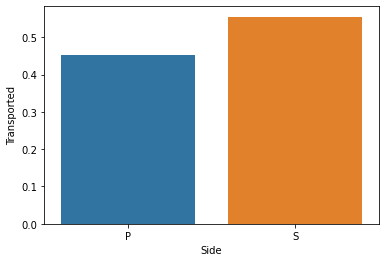

In [7]:
sns.barplot(data=train_data_mod, x='Side', y='Transported', ci=None)

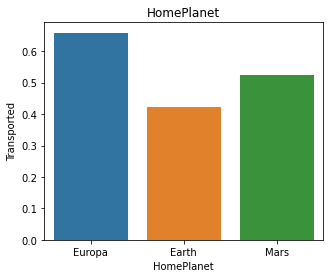

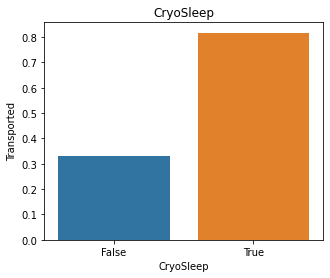

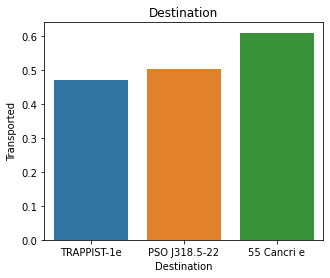

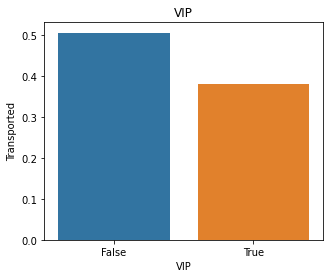

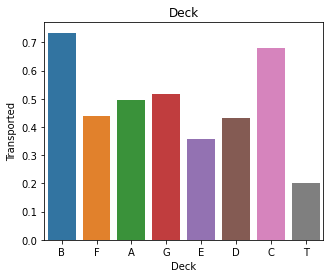

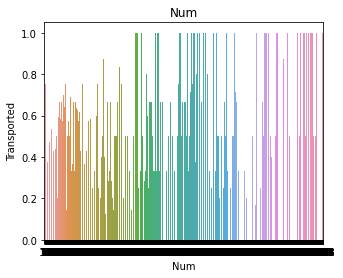

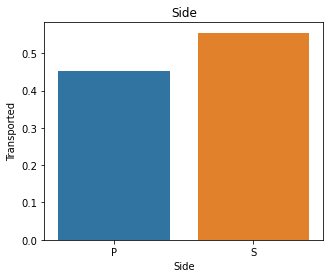

In [8]:
col = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Num', 'Side']
for c in col:
    plt.figure(figsize=(5, 4))
    plt.title(f'{c}')
    sns.barplot(data=train_data_mod, x=c, y='Transported', ci=None)
    plt.show()

I got the idea to do this from this discussion page: https://www.kaggle.com/competitions/spaceship-titanic/discussion/366151

<AxesSubplot:xlabel='Age', ylabel='PassengerId'>

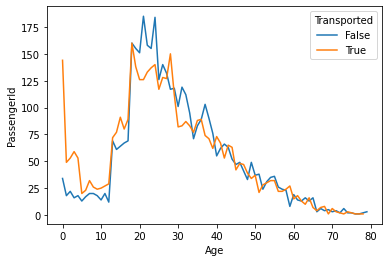

In [12]:
ages = train_data_mod.groupby(['Age', 'Transported']).count()['PassengerId'].reset_index()
sns.lineplot(data=ages, x = 'Age', y = 'PassengerId', hue = 'Transported')